
## Customer Lifetime Value (CLTV) 

💰  **Definition:** CLTV is the total revenue a business can reasonably expect to earn from a single customer over the entire duration of their relationship.

🎯 **Why CLTV is a Critical Metric**

For a Software as a Service (SaaS) business, where revenue is subscription-based and recurs over time, **CLTV** is especially vital because it helps you:

1. **Assess Profitability:** It shows the long-term value of a customer versus the cost to acquire and serve them.
2. **Determine Customer Acquisition Cost (CAC) Limits:** CLTV sets the upper limit on how much you can afford to spend to acquire a new customer (ideally, your CLTV should be at least **3 times** your CAC).
3. **Guide Strategic Decisions:** It informs pricing, sales, marketing, and customer success strategies—you should invest more in acquiring and retaining high-CLTV customer segments.
4. **Forecast Revenue:** It helps in projecting future revenue streams and overall financial health.

### 🛠️ The CLTV Formula (Transaction-Based)

Customer Lifetime Value (CLTV) estimates the **total expected profit from a customer** based on their past purchasing behavior and expected retention.

$$\text{CLTV} = \frac{(\text{Average Order Value} \times \text{Purchase Frequency})\times \text{Gross Margin}}{\text{Customer Churn Rate}}$$

**Key Metrics Defined:**

| Metric | Definition | Formula |
| :--- | :--- | :--- |
| **Average Order Value (AOV)** | The average amount a customer spends per order. | $$\text{AOV} = \frac{\text{Total Sales}}{\text{Number of Orders}}$$ |
| **Purchase Frequency** | How often customers place orders within a given period. | $$\text{Purchase Frequency} = \frac{\text{Total Orders}}{\text{Number of Unique Customers}}$$ |
| **Gross Margin** | The average profitability of each sale after variable costs (such as delivery and development). | $$\text{Gross Margin} = \frac{\text{Sales} - \text{COGS}}{\text{Sales}}$$  |
| **Expected Customer Lifespan** | The predicted number of periods (e.g., months or years) a customer remains active. | $$\text{Expected Lifespan} = \frac{1}{\text{Churn Rate}}$$ |
| **Churn Rate** | The proportion of customers lost in a given period. | $$\text{Churn Rate} = 1 - \frac{\text{Active Customers at End}}{\text{Active Customers at Start}}$$ |

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#source: https://www.kaggle.com/code/gabrielenoaro/saas-company-aws-sales-exploratory-data-analys
usersCsvPath = "C:\\Users\\olesia.tankersley\\Downloads\\Go-To-Market-Analytics\\data\\SaaS-Sales.csv"
df = pd.read_csv(usersCsvPath, parse_dates = ['Order Date'])

## Dataset Description

The SaaS Sales dataset captures transactional data for software-as-a-service (SaaS) product sales across multiple regions and industries. Each record represents an individual order line, including information about the customer, geography, product details, and key commercial metrics. The dataset enables analysis of sales performance, profitability, and customer segmentation over time, supporting insights into pricing effectiveness, regional demand, and customer value. 

The dataset includes both categorical and quantitative variables, allowing exploration of dimensions such as industry, region, and segment alongside financial outcomes like sales revenue, discounts, and profit.

## Data Dictionary

| **Field Name**   | **Description**                                                                         |
| ---------------- | --------------------------------------------------------------------------------------- |
| **Row ID**       | Unique identifier for each row or transaction record.                                   |
| **Order ID**     | Identifier linking multiple items or licenses under a single order.                     |
| **Order Date**   | Date when the order was placed or confirmed.                                            |
| **Date Key**     | Numeric or formatted key used for joining with a time dimension table (e.g., YYYYMMDD). |
| **Contact Name** | Name of the customer contact person associated with the order.                          |
| **Country**      | Country where the customer is located.                                                  |
| **City**         | City corresponding to the customer’s address or billing location.                       |
| **Region**       | Higher-level geographic region (e.g., North America, EMEA, APAC).                       |
| **Subregion**    | Subdivision within a region (e.g., Western Europe, Southeast Asia).                     |
| **Customer**     | Name of the customer organization purchasing the SaaS product.                          |
| **Customer ID**  | Unique identifier assigned to each customer.                                            |
| **Industry**     | Industry classification of the customer (e.g., Healthcare, Finance, Manufacturing).     |
| **Segment**      | Market or business segment (e.g., Enterprise, SMB, Public Sector).                      |
| **Product**      | Name or type of SaaS product sold.                                                      |
| **License**      | Type or tier of license ID.                                                             |
| **Sales**        | Total sales revenue for the order line, typically before discounts.                     |
| **Quantity**     | Number of units or licenses sold.                                                       |
| **Discount**     | Discount applied to the sales amount (absolute or percentage).                          |
| **Profit**       | Net profit derived from the sale after accounting for costs and discounts.              |

### Step 1: Inspect the dataset

In [9]:
df.head().T

,0,1,2,3,4
Row ID,1,2,3,4,5
Order ID,EMEA-2022-152156,EMEA-2022-152156,AMER-2022-138688,EMEA-2021-108966,EMEA-2021-108966
Order Date,2022-11-09 00:00:00,2022-11-09 00:00:00,2022-06-13 00:00:00,2021-10-11 00:00:00,2021-10-11 00:00:00
Date Key,20221109,20221109,20220613,20211011,20211011
Contact Name,Nathan Bell,Nathan Bell,Deirdre Bailey,Zoe Hodges,Zoe Hodges
Country,Ireland,Ireland,United States,Germany,Germany
City,Dublin,Dublin,New York City,Stuttgart,Stuttgart
Region,EMEA,EMEA,AMER,EMEA,EMEA
Subregion,UKIR,UKIR,NAMER,EU-WEST,EU-WEST
Customer,Chevron,Chevron,Phillips 66,Royal Dutch Shell,Royal Dutch Shell


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [12]:
df.describe(include = ['object'])

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


In [13]:
df.describe(include = ['number'])

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
#check if row ids are unique
df['Row ID'].is_unique

True

In [15]:
#check if there are more than 1 product per order
df['Order ID'].is_unique

False

In [16]:
#product can appear more than one time per order 
#for p in df['Order ID'].drop_duplicates().to_list(): 
    #print(p, df.loc[df['Order ID'] == p, 'Product'].is_unique)

In [17]:
df[df['Order ID'] == 'EMEA-2022-152156']

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820


In [18]:
df[df['Order ID'] =='AMER-2020-115812'].sort_values(by = 'Product', ascending = False)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7,8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.152,6,0.2,90.7152
11,12,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,JG14MOU94R,911.424,4,0.2,68.3568
5,6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.860,7,0.0,14.1694
9,10,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.900,5,0.0,34.4700
8,9,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.504,3,0.2,5.7825
10,11,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.184,9,0.2,85.3092
6,7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.280,4,0.0,1.9656


In [19]:
#check  if customer has multiple orders 
df.groupby('Customer ID')['Order ID'].nunique()

Customer ID
1001    31
1002    76
1003    61
1004    62
1005    71
        ..
1097    53
1098    40
1099    47
1100    52
1101    36
Name: Order ID, Length: 99, dtype: int64

In [20]:
#yes, a single customer can have more than one order in the dataset
df[df['Customer ID'] == 1001]['Order Date'].unique()

<DatetimeArray>
['2021-04-30 00:00:00', '2020-08-03 00:00:00', '2021-09-26 00:00:00',
 '2022-02-08 00:00:00', '2021-06-25 00:00:00', '2021-02-03 00:00:00',
 '2021-10-30 00:00:00', '2021-03-19 00:00:00', '2022-11-12 00:00:00',
 '2023-12-19 00:00:00', '2022-03-21 00:00:00', '2023-05-08 00:00:00',
 '2021-11-30 00:00:00', '2023-10-23 00:00:00', '2020-12-06 00:00:00',
 '2020-05-13 00:00:00', '2023-10-05 00:00:00', '2022-05-10 00:00:00',
 '2020-10-25 00:00:00', '2021-09-19 00:00:00', '2020-04-22 00:00:00',
 '2023-10-15 00:00:00', '2020-04-15 00:00:00', '2023-08-18 00:00:00',
 '2023-08-30 00:00:00', '2020-12-31 00:00:00', '2023-09-02 00:00:00',
 '2023-09-23 00:00:00', '2023-03-22 00:00:00', '2021-05-11 00:00:00',
 '2021-12-27 00:00:00']
Length: 31, dtype: datetime64[ns]

In [21]:
#to define the time period, let's check how many years it spans
# we have 4 years of data to calculate an average revenue per account
print(f" minimum order date: {df['Order Date'].min()}, maximum order date: {df['Order Date'].max()}")

 minimum order date: 2020-01-04 00:00:00, maximum order date: 2023-12-31 00:00:00


### Step 2. Summarize by Customer

In [23]:
customer_summary = (
    
    df.groupby('Customer ID')
      .agg({'Sales': 'sum', 'Profit': 'sum', 'Order Date': ['min', 'max'], 'Order ID': 'nunique'})
      .reset_index()
)
customer_summary.columns = ['Customer ID', 'Total Sales', 'Total Profit', 'First Purchase Date', 'Last Purchase Date', 'Num of Orders']

In [24]:
customer_summary['Customer Age (days)'] = (customer_summary['Last Purchase Date'] - customer_summary['First Purchase Date']).dt.days + 1

In [25]:
customer_summary['Avg Order Value'] = (customer_summary['Total Sales']/customer_summary['Num of Orders']).round(2)

In [26]:
customer_summary.head(3)

,Customer ID,Total Sales,Total Profit,First Purchase Date,Last Purchase Date,Num of Orders,Customer Age (days),Avg Order Value
0,1001,12617.114,2281.7391,2020-04-15,2023-12-19,31,1344,407.00
1,1002,27278.593,3312.6698,2020-03-31,2023-12-10,76,1350,358.93
2,1003,39941.640,-2796.2935,2020-02-19,2023-12-30,61,1411,654.78


### Step 3. Calculate Purchase Frequency

In [28]:
# Total number of customers
total_customers = customer_summary['Customer ID'].nunique()
# Purchase frequency = total orders / total unique customers
purchase_frequency = df['Order ID'].nunique() / total_customers

### Step 4. Calculate Profit Margin

In [30]:
# Gross margin (as ratio)
customer_summary['Gross Margin'] = customer_summary['Total Profit'] / customer_summary['Total Sales']
avg_gross_margin = customer_summary['Gross Margin'].mean()

### 5. Calculate Churn Rate

In this dataset, each customer has an order history, not an ongoing contract. So churn is inferred as a period of inactivity beyond a reasonable expectation of repurchase. Let's assume that the dataset contains **consumption-based SaaS products**

A customer who hasn’t purchased in 6 months might be considered “churned” — if the typical repurchase cycle is 2 months. So “churn” depends on purchase cadence — not just time elapsed. Customers pay per use case. 

In [32]:
# Calculate the number of unique active customers each year (or month)
df['YearMonth'] = df['Order Date'].dt.to_period('M')

In [33]:
today = df['Order Date'].max()
avg_ip_time = df.groupby('Customer ID')['Order Date'].apply(lambda x: x.sort_values().diff().mean())

In [34]:
avg_ip_time

Customer ID
1001   20 days 08:21:49.090909091
1002              8 days 21:00:00
1003   13 days 13:23:04.615384615
1004   10 days 18:46:00.902255639
1005   10 days 05:49:24.705882353
                  ...            
1097   13 days 04:42:21.176470588
1098   20 days 19:28:41.739130434
1099   14 days 22:01:14.226804123
1100   13 days 15:31:45.882352941
1101   16 days 06:39:02.168674698
Name: Order Date, Length: 99, dtype: timedelta64[ns]

In [35]:
avg_ip_time =  avg_ip_time.mean()

In [36]:
#on average, customers use a consuption-based product every 15 days 
avg_ip_time

Timedelta('15 days 19:13:03.561429828')

In [37]:
df_last = df.groupby('Customer ID')['Order Date'].max().reset_index()
df_last['DaysSinceLastPurchase'] = (today - df_last['Order Date']).dt.days

In [38]:
df_last.head(3)

,Customer ID,Order Date,DaysSinceLastPurchase
0,1001,2023-12-19,12
1,1002,2023-12-10,21
2,1003,2023-12-30,1


In [39]:
# a customer is considered churned out after 30 days of inactivity
churned_customers = df_last[df_last['DaysSinceLastPurchase'] > 2 * avg_ip_time.days]
churn_rate = len(churned_customers) / df_last['Customer ID'].nunique()

### 5. Compute Customer Lifetime Value

In [41]:
customer_summary['CLTV'] = (customer_summary['Avg Order Value'] *
                            purchase_frequency *
                            avg_gross_margin / churn_rate).round(2)

In [42]:
customer_summary.sort_values('CLTV', ascending=False).head(3)

,Customer ID,Total Sales,Total Profit,First Purchase Date,Last Purchase Date,Num of Orders,Customer Age (days),Avg Order Value,Gross Margin,CLTV
28,1029,55719.210,5953.2038,2020-01-14,2023-12-24,58,1441,960.68,0.106843,38409.45
82,1085,15736.129,1207.3113,2020-07-25,2023-12-04,20,1228,786.81,0.076722,31457.86
20,1021,28643.804,9449.0246,2020-02-28,2023-12-22,38,1394,753.78,0.329880,30137.27


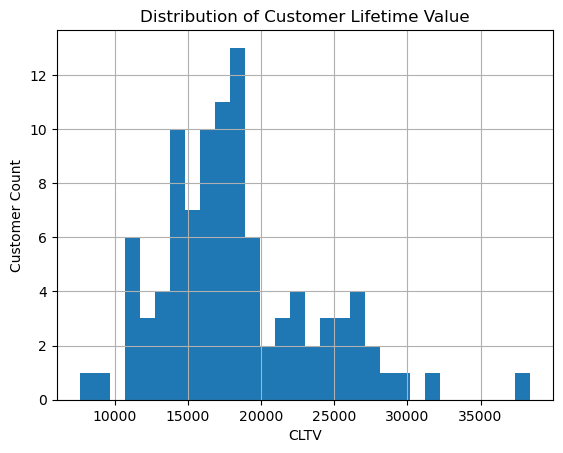

In [43]:
#let's inspect distribution of CLTV:
customer_summary['CLTV'].hist(bins=30)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('CLTV')
plt.ylabel('Customer Count')
plt.show()

In [44]:
customer_summary['CLTV Segment'] = pd.qcut(customer_summary['CLTV'], 4, labels=['Low', 'Mid', 'High', 'Top'])

In [45]:
margin_cutoff_value = 0.25
customer_summary['Margin Tier'] = np.where(customer_summary['Gross Margin'] > margin_cutoff_value, 'Top', 'Standard')

In [46]:
customer_summary.head(3)

,Customer ID,Total Sales,Total Profit,First Purchase Date,Last Purchase Date,Num of Orders,Customer Age (days),Avg Order Value,Gross Margin,CLTV,CLTV Segment,Margin Tier
0,1001,12617.114,2281.7391,2020-04-15,2023-12-19,31,1344,407.00,0.180845,16272.48,Mid,Standard
1,1002,27278.593,3312.6698,2020-03-31,2023-12-10,76,1350,358.93,0.121438,14350.57,Low,Standard
2,1003,39941.640,-2796.2935,2020-02-19,2023-12-30,61,1411,654.78,-0.070009,26179.10,Top,Standard


In [96]:
customer_summary.groupby(['Margin Tier', 'CLTV Segment'], observed=False).agg({'CLTV': 'mean', 'Customer ID': 'count'}).round(2)

CLTV  Customer ID
Margin Tier CLTV Segment                       
Standard    Low           12767.33           25
            Mid           16371.97           25
            High          18744.71           24
            Top           25526.72           20
Top         Low                NaN            0
            Mid                NaN            0
            High               NaN            0
            Top           25991.59            5

In [48]:
customer_summary['Industry'] = customer_summary['Customer ID'].map(df[['Customer ID', 'Industry']]\
                                                                   .drop_duplicates().set_index('Customer ID')['Industry'].to_dict())

In [94]:
customer_summary.groupby(['Industry'], observed=False).agg({'CLTV': 'mean', 'Customer ID': 'count'}).sort_values(by = 'Customer ID', ascending = False).round(2)

,CLTV,Customer ID
Industry,,
Finance,17413.71,20
Energy,17560.29,14
Tech,17415.80,13
Manufacturing,18656.83,11
Retail,18872.12,11
Healthcare,21096.21,10
Consumer Products,18992.73,9
Communications,16505.09,5
Transportation,19942.59,4


### Conclusion: 
Segmentation based on CLTV and Gross Margin revealed the most profitable customer segments, guiding strategies for retention and share-of-wallet growth.
Segmentation by Industry highlighted the key revenue drivers, enabling more targeted customer conversations and more effective allocation of resources.